# Machine Learning 


**Stats Models**

- Modelo Lineal Stats models  (Todo sobre lineal)


**Sickit - Learn**

- Intro KNN
- KNN  Cross-Validation
-  Grid Search
-  Pre-Prosecing
- Linear Model for Regression and classification
-  Model Evaluation





##  Stats Models
---





**Descripción DataSet**
---

[Descripcion](https://vincentarelbundock.github.io/Rdatasets/doc/HistData/Guerry.html)

Andre-Michel Guerry (1833) was the first to systematically collect and analyze social data on such things as crime, literacy and suicide with the view to determining social laws and the relations among these variables.

The Guerry data frame comprises a collection of 'moral variables' on the 86 departments of France around 1830. A few additional variables have been added from other sources.

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Obteniendo un data set
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
df=dat
df.dropna(axis=0, inplace=True)

In [5]:
print(dat.shape, "\n")
dat.head()

(86, 23) 



,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,Wealth,Commerce,Clergy,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,73,58,11,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,22,10,82,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,61,66,68,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,76,49,5,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,83,65,10,22,23,64,79,35,7,1,320.280,5549,129.10


In [6]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)+ Region', data=dat).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     7.247
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           3.60e-06
Time:                        19:59:42   Log-Likelihood:                -374.00
No. Observations:                  85   AIC:                             762.0
Df Residuals:                      78   BIC:                             779.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         271.4901     44.313     

Stats models automaticamente detecta variables categóricas, si queremos que trate una variable intenger como categórica incluimos  **C(variable)**.

In [7]:
results.params

Intercept          271.490096
Region[T.E]          1.686028
Region[T.N]          6.935364
Region[T.S]         -5.222871
Region[T.W]          3.047264
Literacy            -0.583573
np.log(Pop1831)    -35.216425
dtype: float64

In [8]:
res1 = smf.ols(formula='Lottery ~ Literacy : Wealth - 1', data=df).fit() # multiplicativo 

res2 = smf.ols(formula='Lottery ~ Literacy * Wealth - 1', data=df).fit() # multiplicativo, incluye individuales

print(res1.params, "\n")

print(res2.params)


Literacy:Wealth    0.018438
dtype: float64 

Literacy           0.443604
Wealth             1.077784
Literacy:Wealth   -0.013583
dtype: float64


Test Estadísticos
---

[Statistic Test ](https://www.statsmodels.org/stable/stats.html#residual-diagnostics-and-specification-tests)

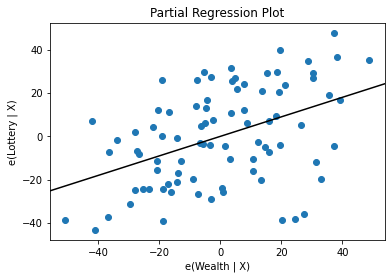

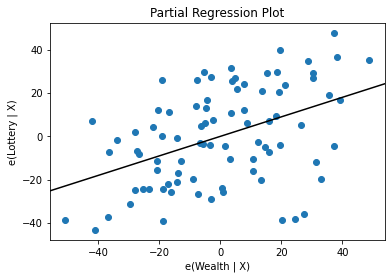

In [22]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],
                           data=df, obs_labels=False)

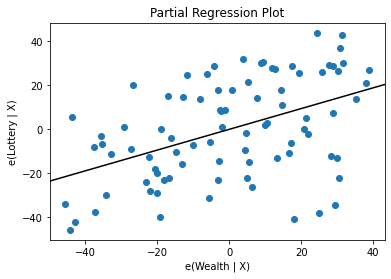

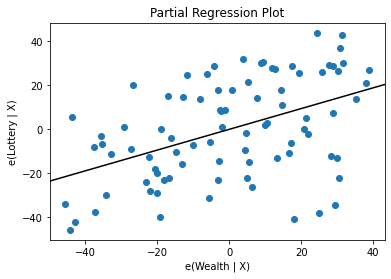

In [26]:
sm.graphics.plot_partregress('Lottery', 'Wealth',['Region'], data=df, obs_labels=False)

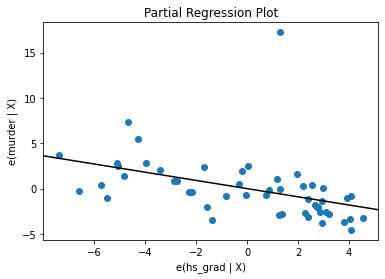

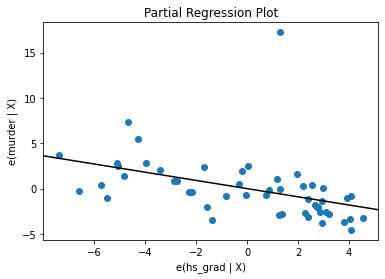

In [30]:
crime_data = sm.datasets.statecrime.load_pandas()
sm.graphics.plot_partregress(endog='murder', exog_i='hs_grad',
                              exog_others=['urban', 'poverty', 'single'],
                             data=crime_data.data, obs_labels=False)

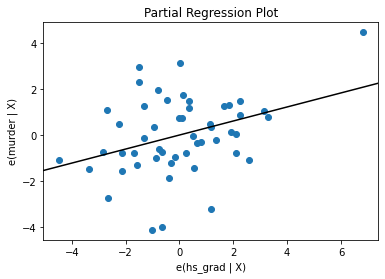

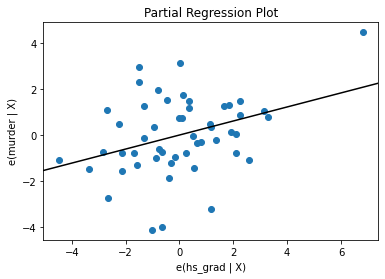

In [31]:
crime_data = sm.datasets.statecrime.load_pandas()
sm.graphics.plot_partregress(endog='murder', exog_i='hs_grad',
                              exog_others=['urban', 'poverty', 'single'],
                             data=crime_data.data, obs_labels=False)

In [32]:
 sm.webdoc()

In [33]:
sm.webdoc('glm')